In [1]:
from dreye.api.optimize import lsq_linear as lsq
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

In [2]:
from numpy.random import default_rng

In [56]:
rng = default_rng(10)
A = np.array([
    [1, 0.2, 0.1, 0, 0, 0], 
    [1, 1.3, 0.5, 0.2, 0, 0], 
    [0.4, 0.6, 1.2, 1, 0.1, 0], 
    [0.1, 0.1, 0.1, 0.1, 0.6, 0.4],
])
n, m = A.shape
Epsilon = (A * np.array([1, 1, 1, 1])[:, None])**2

Xtrue = rng.random((100, m))
Xtrue = Xtrue/np.sum(Xtrue, axis=1, keepdims=True)
lb = 0
ub = 10

B = Xtrue @ A.T
# B = B / np.sum(B, axis=1, keepdims=True) * n

In [57]:
x = lsq.lsq_linear_minimize(
    A, (A*0.1).sum(1), Epsilon, 
    ub=ub, lb=lb, 
    solver=cp.ECOS, 
    l2_eps=0.2
    #return_pred=True
)
np.round(x, 2)

array([[0.05, 0.06, 0.06, 0.07, 0.06, 0.06]])

In [58]:
x = lsq.lsq_linear_cp(
    A, (A*0.1).sum(1), 
    ub=ub, lb=lb, 
    #return_pred=True
)
np.round(x, 2)

array([[0.1 , 0.1 , 0.1 , 0.09, 0.12, 0.07]])

In [59]:
X = lsq.lsq_linear_cp(
    A, B, 
    ub=ub, lb=lb, 
    underdetermined_opt=1, 
    l2_eps=1e-4
)

In [60]:
Xmin = lsq.lsq_linear_minimize(
    A, B, Epsilon, 
    ub=ub, lb=lb, 
    norm=1e-4,
    l2_eps=1e-5,
    I=1, 
    i_eps=0.1, 
)

In [61]:
from sklearn.metrics import pairwise_distances

In [62]:
bp = pairwise_distances(B)
xpmin = pairwise_distances(Xmin)
xp = pairwise_distances(X)

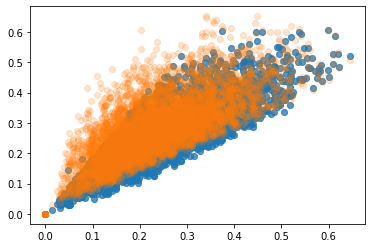

In [63]:
plt.scatter(bp.ravel(), xpmin.ravel(), alpha=0.5)
plt.scatter(bp.ravel(), xp.ravel(), alpha=0.1)

(array([ 2.,  7., 12.,  9., 22., 25.,  9.,  6.,  3.,  5.]),
 array([-0.08346455, -0.06511808, -0.0467716 , -0.02842513, -0.01007866,
         0.00826781,  0.02661428,  0.04496076,  0.06330723,  0.0816537 ,
         0.10000017]),
 <BarContainer object of 10 artists>)

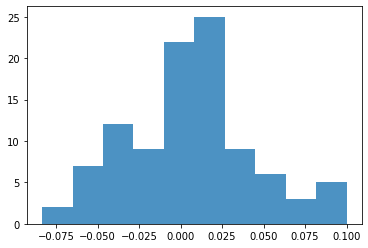

In [73]:
plt.hist(Xmin.sum(1)-X.sum(1), alpha=0.8)
# plt.hist(X.sum(1), alpha=0.8)